# Aprendizado Federado Vertical

In [1]:
import numpy as np
import pandas
import math
import matplotlib.pyplot as plt

In [2]:
Data = pandas.read_csv('Datasets/banknote/data_banknote_authentication.csv')
Data = Data.to_numpy()

In [3]:
m, n = Data.shape
n0 = n - 1

In [4]:
np.random.seed(14)

randseq = np.random.permutation(m)
Data = Data[randseq[0:m], 0:n]

In [5]:
train_num = math.floor(m*0.8)
test_num = m - train_num

In [6]:
x_train_1 = Data[0:train_num, 0].T
x_train_1 = np.reshape(x_train_1, (1, train_num))

x_train_2 = Data[0:train_num, 1].T
x_train_2 = np.reshape(x_train_2, (1, train_num))

x_train_3 = Data[0:train_num, 2:4].T

y_train = Data[0:train_num, n0]

In [10]:
x_train_3[:, 0:4]

array([[-3.1123e+00, -1.0397e-01,  2.6473e+00,  6.3549e+00],
       [-2.7164e+00, -1.9225e-01, -3.7846e-01,  3.0030e-03]])

In [12]:
x_test = Data[train_num:m, 0:n0].T
y_test = Data[train_num:m, n0]

In [13]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

In [14]:
L = 4
neurons = np.array([n0, 5, 5, 1])

In [15]:
W1_1 = np.random.randn(neurons[1],1) # Client 1

W1_2 = np.random.randn(neurons[1],1) # Client 2

# initial model, at Server
W1_3 = np.random.randn(neurons[1],2)
b1 = np.random.randn(neurons[1],1)

W2 = np.random.randn(neurons[2],neurons[1])
b2 = np.random.randn(neurons[2],1)

W3 = np.random.randn(neurons[3],neurons[2])
b3 = np.random.randn(neurons[3],1)

In [18]:
# Hyper paramters
learning_rate = 0.01
rounds = 5000

# Initializing variables

Z1_1 = np.zeros([neurons[1], train_num])
Z1_2 = np.zeros([neurons[1], train_num])
Z1_3 = np.zeros([neurons[1], train_num])

Z1 = np.zeros([neurons[1], train_num])
A1 = np.zeros([neurons[1], train_num])

Z2 = np.zeros([neurons[2], train_num])
A2 = np.zeros([neurons[2], train_num])

Z3 = np.zeros([neurons[3], train_num])
A3 = np.zeros([neurons[3], train_num])

In [19]:
# Training
train_loss = np.zeros((rounds,1))
train_accuracy = np.zeros((rounds,1))

for i in range(rounds):

    Z1_1 = np.dot(W1_1, x_train_1) # Client 1

    Z1_2 = np.dot(W1_2, x_train_2) # Client 2

    Z1_3 = np.dot(W1_3, x_train_3) # Server

    Z1_t = Z1_1 + Z1_2 + Z1_3

    # Forward Propagation
    Z1 = Z1_t + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Metrics computation
    pred_train = A3 > 0.5
    train_accuracy[i] = 1 - np.sum(abs(pred_train - y_train))/train_num   

    train_loss[i] = (-1/train_num)*np.sum(y_train*np.log(A3) + (1-y_train)*np.log(1-A3))

    print(f'Round: {i+1}, Loss: {train_loss[i]}, Accuracy: {train_accuracy[i]}')

    # Backward Propagation
    dZ3 = A3-y_train
    dW3 = (1/train_num)*np.dot(dZ3, A2.T)
    db3 = (1/train_num)*np.sum(dZ3, axis = 1, keepdims = True)

    dA2 = A2*(1-A2)
    dZ2 = np.dot(W3.T, dZ3)*dA2
    dW2 = (1/train_num)*np.dot(dZ2, A1.T)
    db2 = (1/train_num)*np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = A1*(1-A1)
    dZ1 = np.dot(W2.T, dZ2)*dA1
    db1 = (1/train_num)*np.sum(dZ1, axis = 1, keepdims = True)

    dW1_3 = (1/train_num)*np.dot(dZ1, x_train_3.T)

    # Model updates-Server

    W1_3 = W1_3 - learning_rate*dW1_3

    b1 = b1 - learning_rate*db1

    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3

    # Model updates-Client 1
    dW1_1 = (1/train_num)*np.dot(dZ1, x_train_1.T)
    W1_1 = W1_1 - learning_rate*dW1_1

    # Model updates-Client 2
    dW1_2 = (1/train_num)*np.dot(dZ1, x_train_2.T)
    W1_2 = W1_2 - learning_rate*dW1_2

Round: 1, Loss: [0.44823688], Accuracy: [0.94074749]
Round: 2, Loss: [0.44806522], Accuracy: [0.94074749]
Round: 3, Loss: [0.44789359], Accuracy: [0.94074749]
Round: 4, Loss: [0.44772199], Accuracy: [0.94074749]
Round: 5, Loss: [0.44755041], Accuracy: [0.94074749]
Round: 6, Loss: [0.44737886], Accuracy: [0.94074749]
Round: 7, Loss: [0.44720734], Accuracy: [0.94074749]
Round: 8, Loss: [0.44703585], Accuracy: [0.94074749]
Round: 9, Loss: [0.44686439], Accuracy: [0.94074749]
Round: 10, Loss: [0.44669296], Accuracy: [0.94074749]
Round: 11, Loss: [0.44652155], Accuracy: [0.94074749]
Round: 12, Loss: [0.44635018], Accuracy: [0.94165907]
Round: 13, Loss: [0.44617883], Accuracy: [0.94165907]
Round: 14, Loss: [0.44600751], Accuracy: [0.94165907]
Round: 15, Loss: [0.44583622], Accuracy: [0.94165907]
Round: 16, Loss: [0.44566496], Accuracy: [0.94165907]
Round: 17, Loss: [0.44549373], Accuracy: [0.94165907]
Round: 18, Loss: [0.44532253], Accuracy: [0.94165907]
Round: 19, Loss: [0.44515136], Accura

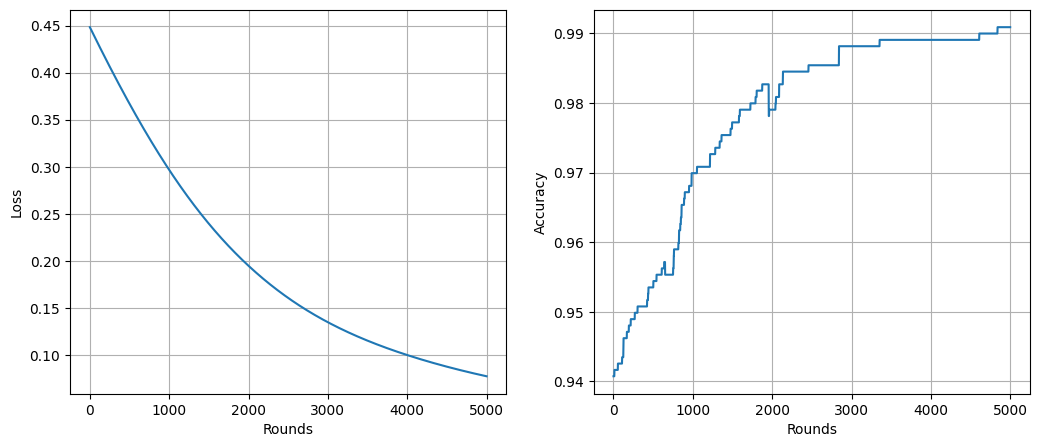

In [22]:
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.grid()
plt.xlabel('Rounds')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.grid()
plt.xlabel('Rounds')
plt.ylabel('Accuracy')

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()

In [21]:
# Forward Propagation

W1 = np.concatenate((W1_1, W1_2, W1_3), axis=1)

Z1 = np.dot(W1, x_test) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

Z3 = np.dot(W3, A2) + b3
A3 = sigmoid(Z3)

# Metrics computation
pred_test = A3 > 0.5
test_accuracy = 1 - np.sum(abs(pred_test - y_test))/test_num

print(test_accuracy)

0.9781818181818182
